<a href="https://colab.research.google.com/github/Swaraj-CSE-AI/My-ML-Project/blob/main/Basic(Deep)_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential, Input
from keras.layers import Flatten, Dense, Dropout

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]
# type(train_images)

np.uint8(194)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

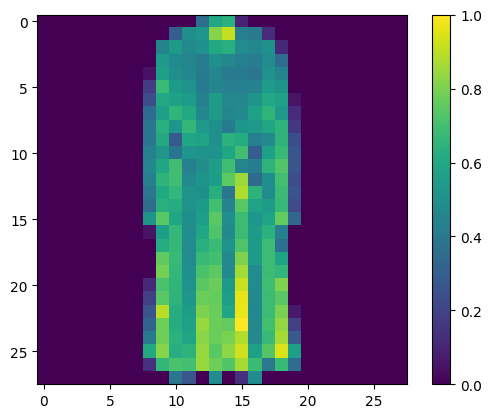

In [ ]:
plt.figure()
plt.imshow(train_images[1459])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
rain_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model.fit(train_images, train_labels, epochs=10, verbose=1) >>>This overfit so change epochs(1) or add dropout to model(0)
model.fit(train_images, train_labels, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7536 - loss: 0.7064
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8461 - loss: 0.4223
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8611 - loss: 0.3872
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8635 - loss: 0.3711
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8708 - loss: 0.3530
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.3348
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8799 - loss: 0.3251
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8804 - loss: 0.3207
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8867 - loss: 0.3078
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8884 - loss: 0.3049


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.3380
Test accuracy: 0.8795999884605408


In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predictions

array([[1.5223476e-08, 6.8692288e-11, 4.4891887e-13, ..., 1.3350557e-02,
        2.6405901e-08, 9.8576677e-01],
       [5.5319400e-05, 2.2179363e-18, 9.9933010e-01, ..., 2.5387508e-23,
        1.6745808e-12, 1.4954226e-17],
       [1.7972559e-09, 1.0000000e+00, 6.2327249e-10, ..., 3.3807153e-28,
        3.8458692e-16, 9.6952289e-21],
       ...,
       [1.1543587e-05, 6.6884595e-11, 8.1613518e-07, ..., 2.0040909e-12,
        9.9991083e-01, 8.1541971e-14],
       [7.8158573e-09, 9.9999154e-01, 2.0276918e-09, ..., 1.6676973e-14,
        7.5963924e-10, 3.6326328e-12],
       [8.6886494e-06, 2.9704366e-09, 1.0323336e-06, ..., 5.1379157e-03,
        4.9570142e-05, 3.2878048e-05]], dtype=float32)

Trouser


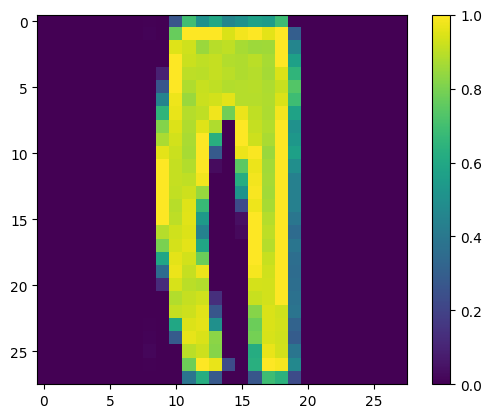

In [ ]:
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


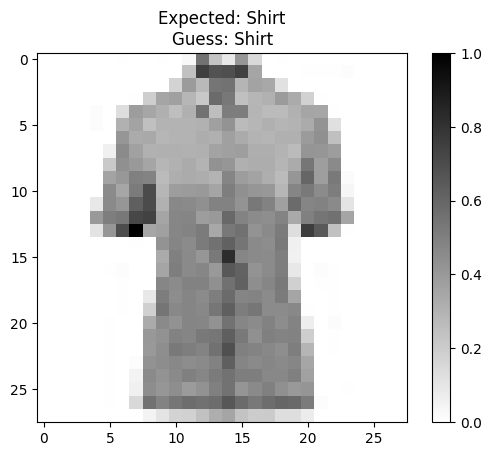

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    # print("DEBUG --> label:", label, "guess:", guess) << label was invisible in o/p bcoz of white background 🐸
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(f"Expected: {label}\nGuess: {guess}", color="black")
    plt.colorbar()
    plt.grid(False)
    plt.show()

# def show_image(img, label, guess):
#   plt.figure()
#   plt.imshow(img, cmap=plt.cm.binary)
#   plt.title("Excpected: " + label, color="black")
#   plt.xlabel("Guess: " + guess, color="black")
#   plt.colorbar()
#   plt.grid(False)
#   plt.show()

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return num
        print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)